# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [1]:
from aitlas.datasets import AmazonRainforestDataset
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTransponse
from aitlas.utils import image_loader

## Visualize images and masks

Total number of patches: 30


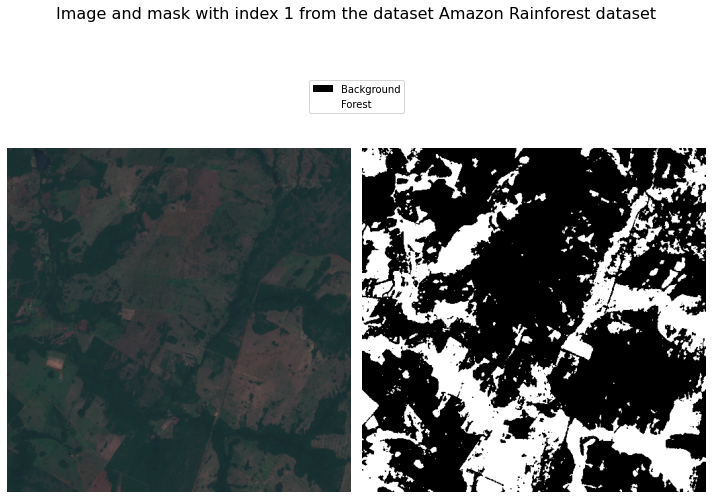

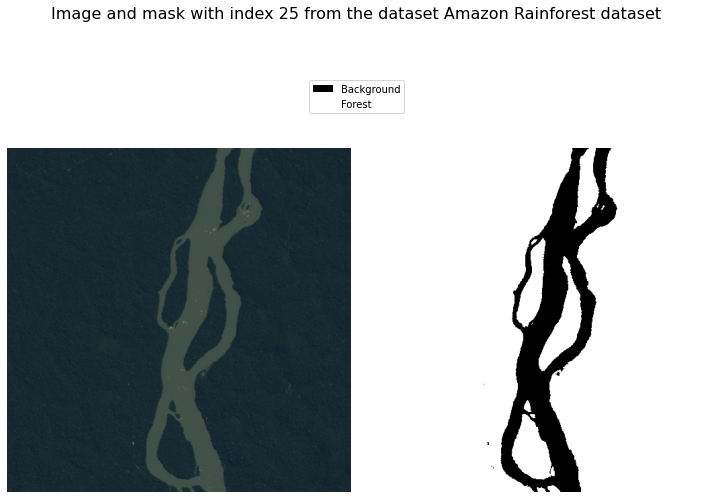

In [3]:
dataset_config = {
    "data_dir": "/media/hdd/semantic-segmentation/AmazonForest/Training"
}
dataset = AmazonRainforestDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(1);
dataset.show_image(25);

## Load train data

In [7]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/media/hdd/semantic-segmentation/AmazonForest/Training",
    "transforms": ["aitlas.transforms.MinMaxNormTransponse"],
    "target_transforms": ["aitlas.transforms.Transponse"]
}
train_dataset = AmazonRainforestDataset(train_dataset_config)
len(train_dataset)

30

## Create the model

In [11]:
epochs = 25
model_directory = "/media/hdd/semantic-segmentation/AmazonForest/experiments"
model_config = {
    "num_classes": 2, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [12]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
)

2021-12-04 13:11:40,859 INFO Starting training.
training: 100%|███████████████████████████████████| 8/8 [00:29<00:00,  3.69s/it]
2021-12-04 13:12:10,478 INFO epoch: 1, time: 30, loss:  0.32976
testing on train set: 100%|███████████████████████| 8/8 [00:02<00:00,  3.07it/s]
2021-12-04 13:12:17,231 INFO IOU Mean:0.1058585482329363, IOU per Class:0.04919605591373208, 0.16252104055214053
training: 100%|███████████████████████████████████| 8/8 [00:29<00:00,  3.70s/it]
2021-12-04 13:12:46,844 INFO epoch: 2, time: 29, loss:  0.22729
testing on train set: 100%|███████████████████████| 8/8 [00:02<00:00,  3.06it/s]
2021-12-04 13:12:49,467 INFO IOU Mean:0.3685225087005771, IOU per Class:0.32313445198039215, 0.4139105654207621
training: 100%|███████████████████████████████████| 8/8 [00:29<00:00,  3.71s/it]
2021-12-04 13:13:19,154 INFO epoch: 3, time: 30, loss:  0.17603
testing on train set: 100%|███████████████████████| 8/8 [00:02<00:00,  3.06it/s]
2021-12-04 13:13:21,774 INFO IOU Mean:0.390663599

training: 100%|███████████████████████████████████| 8/8 [00:29<00:00,  3.72s/it]
2021-12-04 13:25:20,560 INFO epoch: 25, time: 30, loss:  0.04208
testing on train set: 100%|███████████████████████| 8/8 [00:02<00:00,  3.05it/s]
2021-12-04 13:25:23,189 INFO IOU Mean:0.8707722047964732, IOU per Class:0.854477047920227, 0.8870673616727193
2021-12-04 13:25:27,313 INFO finished training. training time: 827


## Evalute the model using test data

In [14]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/media/hdd/semantic-segmentation/AmazonForest/Validation",
    "transforms": ["aitlas.transforms.MinMaxNormTransponse"],
    "target_transforms": ["aitlas.transforms.Transponse"]
}

test_dataset = AmazonRainforestDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model_path = "/media/hdd/semantic-segmentation/AmazonForest/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(["iou"])

2021-12-04 13:26:23,016 INFO Loading checkpoint /media/hdd/semantic-segmentation/AmazonForest/experiments/checkpoint.pth.tar
2021-12-04 13:26:23,426 INFO Loaded checkpoint /media/hdd/semantic-segmentation/AmazonForest/experiments/checkpoint.pth.tar at epoch 26
testing on test set: 100%|████████████████████████| 4/4 [00:01<00:00,  2.38it/s]


[{'IOU Mean': 0.7834894706805546,
  'IOU per Class': [0.7656207084655762, 0.8013582328955332]}]

## Predictions

2021-12-04 13:27:01,807 INFO Loading checkpoint /media/hdd/semantic-segmentation/AmazonForest/experiments/checkpoint.pth.tar
2021-12-04 13:27:02,129 INFO Loaded checkpoint /media/hdd/semantic-segmentation/AmazonForest/experiments/checkpoint.pth.tar at epoch 26


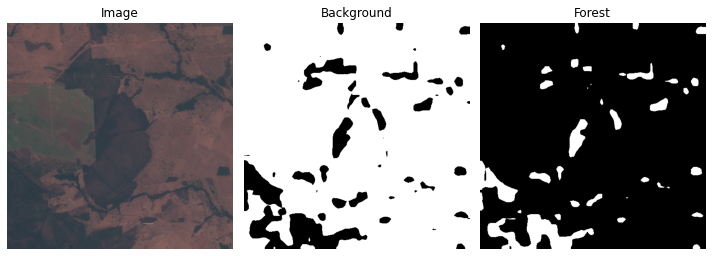

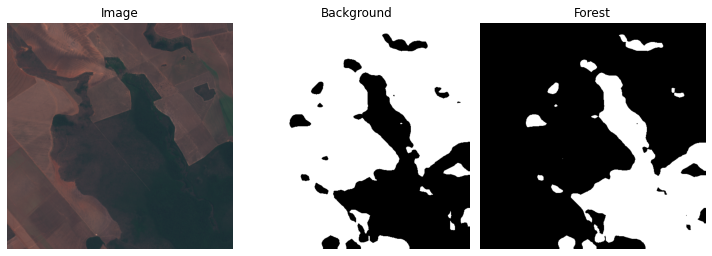

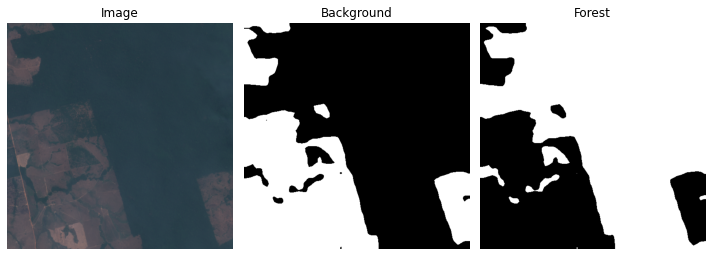

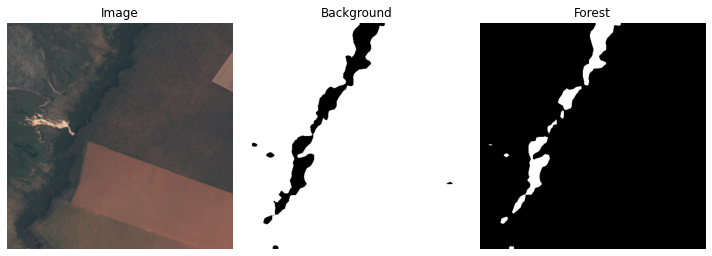

In [16]:
model_path = "/media/hdd/semantic-segmentation/AmazonForest/experiments/checkpoint.pth.tar"
#labels = AmazonRainforestDataset.labels
labels = ["Background", "Forest"]
transform = MinMaxNormTransponse()
model.load_model(model_path)

image = image_loader('/media/hdd/semantic-segmentation/AmazonForest/Test/7.tiff')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/media/hdd/semantic-segmentation/AmazonForest/Test/6.tiff')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/media/hdd/semantic-segmentation/AmazonForest/Test/0.tiff')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/media/hdd/semantic-segmentation/AmazonForest/Test/4.tiff')
fig = model.predict_masks(image, labels, transform)